In [1]:
!pip3 install qiskit
!pip3 install qiskit_aer
!pip3 install qiskit[quantum_info]
!pip3 install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5be51f419251812c435e9c84ff51e25a0989fa3e7f5f020e9bb10f63a4a2109c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import state_fidelity, partial_trace, Statevector
from qiskit.visualization import plot_histogram

Step 1 - Prepare the initial state to teleport on qubit 0

In [3]:
initial_qc = QuantumCircuit(2)
initial_qc.h(0)
initial_qc.t(0)
initial_state = Statevector.from_instruction(initial_qc)

Step 2 - Create a quantum circuit with 3 qubits and 3 classical bits

In [4]:
qc = QuantumCircuit(3, 3)

Step 3 - Prepare qubit 0 to be teleported (T gate)

In [5]:
qc.h(0)
qc.t(0)

Step 4 - Create entangled Bell pair (qubit 1 & 2)

In [6]:
qc.h(1)
qc.cx(1,2)

Step 5 - teleportation protocol

In [7]:
qc.cx(0,1)
qc.h(0)

Step 6 - Measure qubits 0 & 1 and store results

In [8]:
qc.measure([0,1],[0,1])

Step 7 - Conditional corrections based on measurement outcomes

In [9]:
qc.cx(1,2)
qc.cz(0,2)

Step 8 - Save the statevector before measuring qubit 2

In [10]:
qc.save_statevector()

Step 9 - Measure the destination qubit (qubit 2)

In [11]:
qc.measure(2,2)

Step 10 - Remove final measurement for statevector output

In [12]:
qc_no_meas = qc.remove_final_measurements(inplace=False)

Step 11 - Create AerSimulator with statevector method

In [13]:
sim = AerSimulator(method='statevector')
qc_compiled = transpile(qc_no_meas, sim)

Step 12 - Run Simulation and get statevector

In [14]:
result = sim.run(qc_compiled).result()
final_state = result.get_statevector()

Step 13 - Partial trace to get qubit 2 state

In [15]:
from functools import partial
rho_out = partial_trace(final_state, [0,1])

Step 14 - Calculate fidelity

In [16]:
fidelity = state_fidelity(initial_state, rho_out)
print(f"Fidelity between input and teleported qubit: {fidelity:.1f}")

ValueError: shapes (4,) and (2,2) not aligned: 4 (dim 0) != 2 (dim 0)

## Deutsch algorithm

In [17]:
!pip3 install qiskit
!pip3 install qiskit_aer
!pip3 install qiskit[visualization]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [20]:
def constant_oracle_0():
  """Oracle for f(x) = 0 (constant) - identity"""
  oracle = QuantumCircuit(2)
  return oracle

In [21]:
def constant_oracle_1():
  """Oracle for f(x) = 1 (constant) - flips the output qubit"""
  oracle = QuantumCircuit(2)
  oracle.x(1)
  return oracle

In [22]:
def balanced_oracle_x():
  """Oracle for f(x) = x (balanced) - CNOT gate"""
  oracle = QuantumCircuit(2)
  oracle.cx(0, 1)
  return oracle

In [23]:
def deutsch_algorithm(oracle):
  # Create a 2-qubit, 1-classical-bit circuit
  qc = QuantumCircuit(2, 1)
  # Initialize second qubit to |1>
  qc.x(1)
  # Apply Hadamard on both qubits
  qc.h([0, 1])
  qc.barrier() # add a barrier for readability
  # Apply the oracle
  qc.compose(oracle, inplace=True) # append the oracle circuit to qc
  qc.barrier()
  # Apply Hadamard on the first qubit
  qc.h(0)
  # Measure the first qubit
  qc.measure(0, 0)
  return qc

In [24]:
# Select oracle to test; change to test different oracles
oracle = balanced_oracle_x()

In [25]:
# Create the Deutsch algorithm circuit with the chosen oracle
circuit = deutsch_algorithm(oracle)
print(circuit.draw())

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 


In [26]:
# Use Qiskit Aer simulator
simulator = AerSimulator()

In [27]:
# Execute the circuit on the simulator with 100 shots
result = simulator.run(circuit, shots=100).result()
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'1': 100}


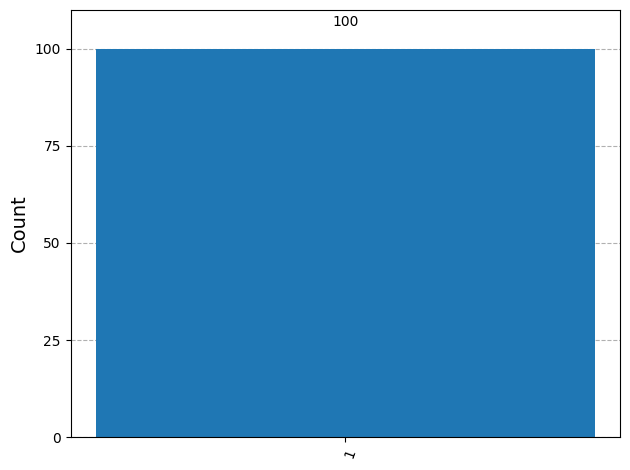

In [28]:
hist_fig = plot_histogram(counts)
hist_fig

## Deutsch-Jozsa algorithm


In [29]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit[visualization]

In [30]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [31]:
def dj_oracle( n, balanced = True ):
  oracle = QuantumCircuit ( n + 1 )
  if balanced:
    for qubit in range( n ):
      oracle.cx( qubit, n )
    else:
      pass
  return oracle

In [32]:
def deutsch_joza( n, oracle ):
  circuit = QuantumCircuit( n+1, n )
  circuit.x( n )
  circuit.h( n )
  circuit.h( range( n ) )
  circuit.compose( oracle, inplace = True )
  circuit.h( range( n ) )
  circuit.measure( range( n ), range( n ) )
  return circuit

In [33]:
n = 3
oracle = dj_oracle( n, balanced = True )
dj_circuit = deutsch_joza( n, oracle )

In [34]:
# Use AerSimulator from qiskit_aer
simulator = AerSimulator()

In [35]:
job = simulator.run( dj_circuit, shots = 1024 )
counts = result.get_counts()
print( "Measurement results:", counts )


Measurement results: {'1': 100}


In [36]:
if '0'*n in counts:
  print( "Function is constant." )
else:
  print( "Function is balanced." )

Function is balanced.


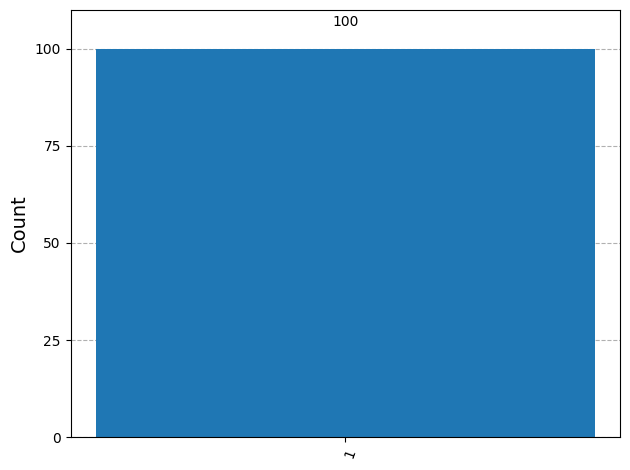

In [37]:
dj_circuit.draw( "mpl")
plot_histogram( counts )

# Grover's Algo

In [45]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
import matplotlib.pyplot as plt

In [63]:
from qiskit import QuantumCircuit

def oracle_for_value(n_qubits, values, search_value):
    """
    Constructs an oracle which flips the phase of all indices
    where the element in 'values' equals 'search_value'.
    """
    oracle = QuantumCircuit(n_qubits, name='oracle')

    # Mark all indices i where values[i] == search_value
    for i, val in enumerate(values):
        if val == search_value:
            # --- This entire block must be indented ---

            # Apply X gates on qubits where the bit of i is '0'
            bits = format(i, f'0{n_qubits}b')
            for qubit, bit in enumerate(reversed(bits)):
                if bit == '0':
                    oracle.x(qubit)

            # Apply multi-controlled Z-gate (implemented with h, mcx, h)
            oracle.h(n_qubits - 1)
            oracle.mcx(list(range(n_qubits - 1)), n_qubits - 1)
            oracle.h(n_qubits - 1)

            # Uncompute the X gates to return to the original state
            for qubit, bit in enumerate(reversed(bits)):
                if bit == '0':
                    oracle.x(qubit)

            # Optional: Add a barrier for better visualization between marked items
            oracle.barrier()

    return oracle

In [64]:
def diffuser( n_qubits ):
  diff = QuantumCircuit( n_qubits)
  diff.h( range(n_qubits))
  diff.x( range(n_qubits))
  diff.h( n_qubits - 1 )
  diff.mcx( list (range( n_qubits - 1 ) ), n_qubits - 1 )
  diff.h( n_qubits - 1 )
  diff.x( range( n_qubits ) )
  diff.h( range( n_qubits ) )
  return diff

In [65]:
def run_grover( n_qubits, oracle, search_value_occurrences ):
  iterations = math.floor( ( math.pi / 4 ) * math.sqrt( 2**n_qubits / search_value_occurrences ) )
  qc = QuantumCircuit( n_qubits, n_qubits )
  qc.h( range( n_qubits ) )
  diff = diffuser( n_qubits )
  for _ in range(iterations):
    qc.compose( oracle, inplace = True )
    qc.compose( diff, inplace = True )

  qc.measure( range( n_qubits ), range( n_qubits ) )
  simulator = AerSimulator()
  compiled_circuit = transpile( qc, simulator )
  result = simulator.run( compiled_circuit, shots=1024 ).result()
  counts = result.get_counts()
  return counts

In [66]:
values = [4, 2, 5, 8, 7]
search_value = 5

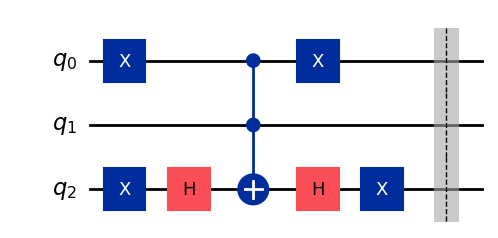

In [68]:
# Number of qubits to cover index range
n_qubits = 3
# Build oracle without target index knowledge
oracle = oracle_for_value( n_qubits, values, search_value )
oracle.draw(output='mpl')


Measurement counts (index of '5' showing high probability):
 {'100': 3, '110': 10, '111': 13, '011': 8, '101': 11, '001': 11, '000': 7, '010': 961}


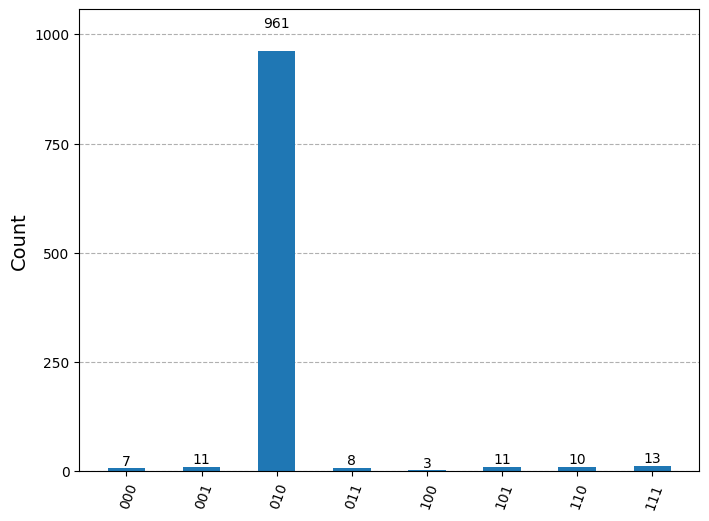

In [61]:


# How many indices have search_value? In this example just one
search_value_occurrences = 0
for i in range( len( values ) ):
  if values[ i ] == search_value:
    search_value_occurrences += 1
    counts = run_grover( n_qubits, oracle, search_value_occurrences )
print( f"Measurement counts (index of '{search_value}' showing high probability):\n", counts )
fig, ax = plt.subplots( figsize = ( 8, 6 ) ) # Create figure and axis
plot_histogram( counts, ax = ax )
plt.show()